# Project Description

## Plant Pathology 2020 - FGVC7 Dataset Overview

### General Information:

- **Name of dataset:** Plant Pathology 2020 - FGVC7
- **Number of classes:** 2
- **Class labels:** Healthy, Disease

### Class Distribution:

- **Healthy samples:** 516
- **Disease samples:** 1305

### Dataset Size:

- **Total samples:** 1821
- **Train set:** 1456
- **Test set:** 365

### Summary:

This dataset comprises two classes, Healthy and Disease, with a total of 1821 samples. The majority of samples belong to the Disease class (1305), while there are 516 samples in the Healthy class.

The dataset is split into a training set (1456 samples) and a test set (365 samples).    

In [20]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/train.csv')
print(df.shape)

(1821, 5)


In [3]:
columns_to_drop = ['multiple_diseases', 'rust', 'scab']
df = df.drop(columns=columns_to_drop)

In [4]:
print(df['healthy'].value_counts())

healthy
0    1305
1     516
Name: count, dtype: int64


# ------------------------------------------------------------

## Feature Extraction using HOG Method

In [5]:
def extract_hog_features(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    
    # Get the original image dimensions
    height, width = img.shape
    scale_factor = 0.2
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    # Resize the image
    img = cv2.resize(img, (new_width, new_height))
    
    hog_features = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=False)
    return hog_features

In [6]:
# Apply feature extraction to all images
image_folder_path = '/kaggle/input/plant-pathology-2020-fgvc7/images/'

hog_feature_list = []
for image_id in df['image_id']:
    img_path = image_folder_path + image_id + '.jpg'
    hog_features = extract_hog_features(img_path)
    hog_feature_list.append(hog_features)

In [7]:
hog_features = np.array(hog_feature_list)
print(hog_features.shape)

t = df["healthy"]
labels = t.values

(1821, 13872)


In [8]:
# Convert feature lists to NumPy arrays
X_train_array = np.array(hog_feature_list)
y_train_array = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_array, y_train_array, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1456, 13872)
X_test shape: (365, 13872)
y_train shape: (1456,)
y_test shape: (365,)


# ------------------------------------------------------------

## Using Canny (Edge Detection) Method

In [ ]:
def extract_edge_features(img_path):
    # Read the image
    # Read the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Get the original image dimensions
    height, width = img.shape
    scale_factor = 0.2
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    # Resize the image
    img = cv2.resize(img, (new_width, new_height))

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    # Flatten the 2D array into a 1D array
    edge_features = edges.ravel()

    return edge_features

In [ ]:
# Apply feature extraction to all images
image_folder_path = '/kaggle/input/plant-pathology-2020-fgvc7/images/'

edge_feature_list = []
for image_id in df['image_id']:

    img_path = image_folder_path + image_id + '.jpg'
    edge_features = extract_edge_features(img_path)
    edge_feature_list.append(edge_features)
#     hog_feature_array = np.vstack((hog_feature_array, hog_features))

In [ ]:
edge_feature_list = np.array(edge_feature_list)
print(edge_feature_list.shape)

t = df["healthy"]
labels = t.values

In [ ]:
# Convert feature lists to NumPy arrays
X_train_array = np.array(edge_feature_list)
y_train_array = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_array, y_train_array, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# ------------------------------------------------------------

In [9]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# First: Let's apply Logistic regression model on the data

In [10]:
model = LogisticRegression(penalty='l2', C=5, max_iter=2000)


# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=2000)

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model: (Logistic regression)
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Test Accuracy: 74.25%
Train Accuracy: 100.00%

Confusion Matrix:
 [[233  32]
 [ 62  38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       265
           1       0.54      0.38      0.45       100

    accuracy                           0.74       365
   macro avg       0.67      0.63      0.64       365
weighted avg       0.72      0.74      0.73       365



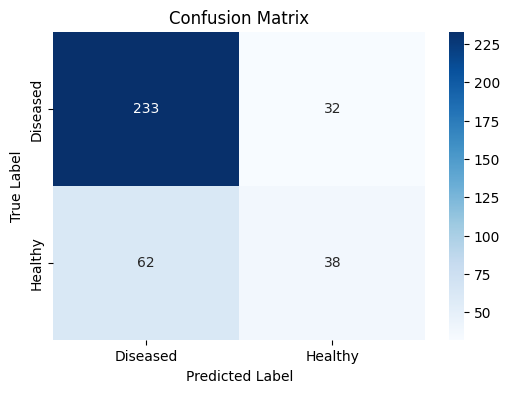

In [27]:
# Plot confusion matrix:  (Logistic regression)
# Assuming conf_matrix is your confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with annotations
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set class labels as ticks
class_names = ['Diseased', 'Healthy']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

# Show plot
plt.show()

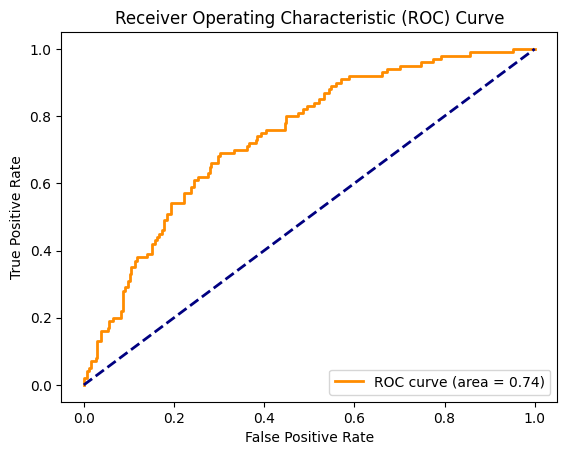

In [13]:
# Plot ROC curve: (Logistic regression)
y_scores = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Second: Let's apply KMeans model on the data

In [16]:
# Fit k-means model on the training data
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)

# Predict cluster labels for the test data
y_pred_kmeans = kmeans.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred_kmeans)
conf_matrix = confusion_matrix(y_test, y_pred_kmeans)
classification_rep = classification_report(y_test, y_pred_kmeans)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 55.34%

Confusion Matrix:
 [[136 129]
 [ 34  66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.51      0.63       265
           1       0.34      0.66      0.45       100

    accuracy                           0.55       365
   macro avg       0.57      0.59      0.54       365
weighted avg       0.67      0.55      0.58       365



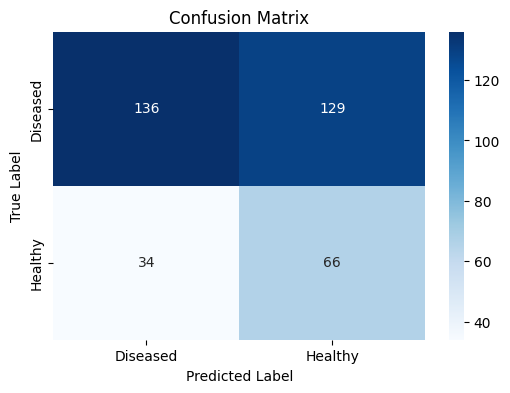

In [28]:
# Assuming conf_matrix is your confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_kmeans)

# Plot confusion matrix with annotations
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set class labels as ticks
class_names = ['Diseased', 'Healthy']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

# Show plot
plt.show()

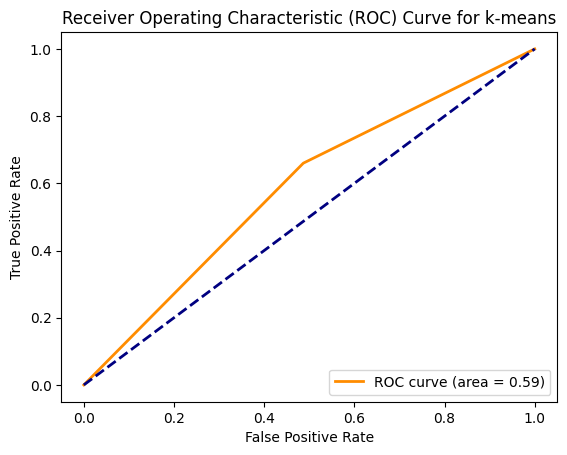

In [29]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_kmeans)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for k-means')
plt.legend(loc='lower right')
plt.show()

## Compare Between Logistic Regression and KMeans Using area under ROC Curve

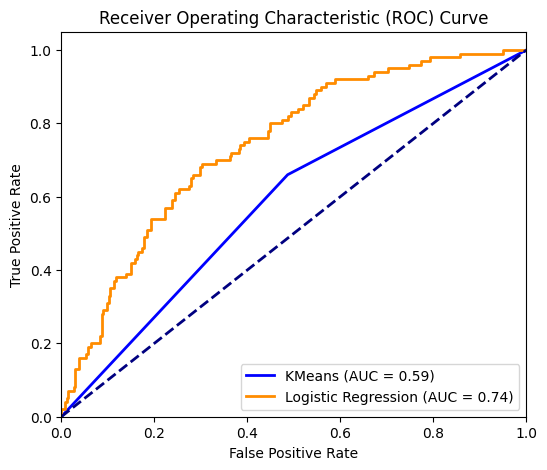

In [32]:
fpr_kmeans, tpr_kmeans, _ = roc_curve(y_test, y_pred_kmeans)
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)

# Compute ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_scores)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curves for both models
plt.figure(figsize=(6, 5))

# KMeans ROC curve
plt.plot(fpr_kmeans, tpr_kmeans, color='blue', lw=2, label='KMeans (AUC = {:.2f})'.format(roc_auc_kmeans))

# Logistic Regression ROC curve
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))

# Random guessing (baseline)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()